<a href="https://colab.research.google.com/github/enikolaev/MMO/blob/main/Lesson%2003.%20Metric%20Classification/LabWork3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Лабораторная работа 3
## Метрические методы классификации

In [2]:
import pandas as pd
import numpy as np

data_source = 'DataSet.data'
d = pd.read_table(data_source, delimiter=',',
                  header=None,
                  names=['X','y',
                         'Time','Map'])
d.head()

,X,y,Time,Map
0,310.422,197.681,0,MASAKI
1,308.406,201.007,0,MASAKI
2,300.075,213.176,0,MASAKI
3,287.578,224.590,15,MASAKI
4,274.006,230.939,15,MASAKI


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       84 non-null     float64
 1   y       84 non-null     float64
 2   Time    84 non-null     int64  
 3   Map     84 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 2.8+ KB


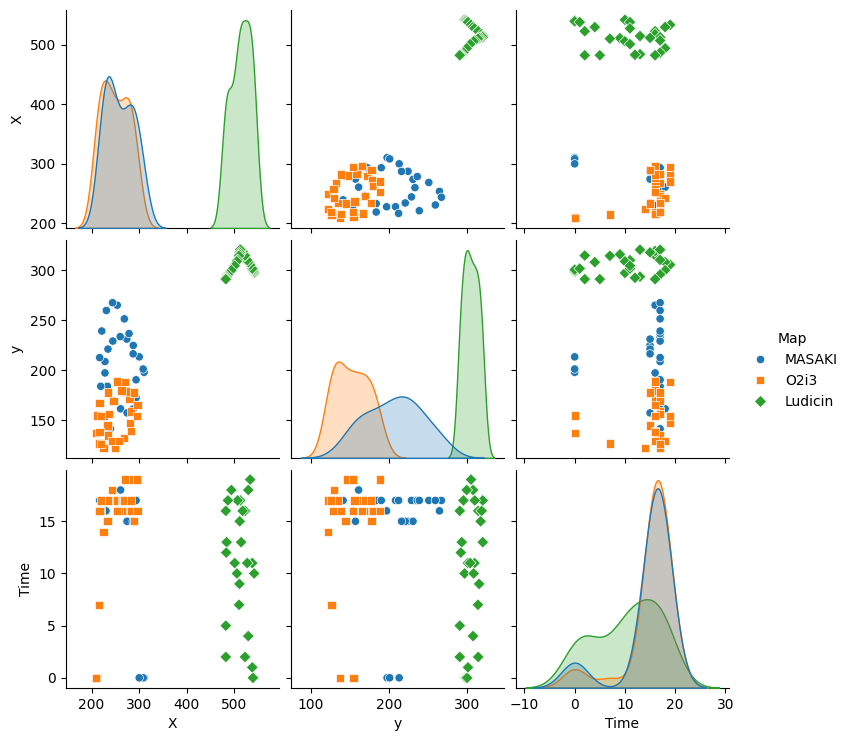

In [4]:
import seaborn as sb
%matplotlib inline
sb.pairplot(d, hue='Map', markers=["o", "s", "D"])

In [5]:
from sklearn.neighbors import KNeighborsClassifier

X_train = d[['X','y','Time']]
y_train = d['Map']

K = 3

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)
# построение модели классификатора (процедура обучения)
knn.fit(X_train.values, y_train)

# Использование классификатора
# Объявление признаков объекта
X_test = np.array([[1.2, 1.0, 2.8]])
# Получение ответа для нового объекта
target = knn.predict(X_test)
print(target)


['O2i3']


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_holdout, y_train, y_holdout = train_test_split(
    d.iloc[ :, 0:3 ],
    d['Map'],
    test_size=0.3,
    random_state=17)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_holdout)
accur = accuracy_score(y_holdout, knn_pred)
print('accuracy: ', accur)

accuracy:  0.8461538461538461


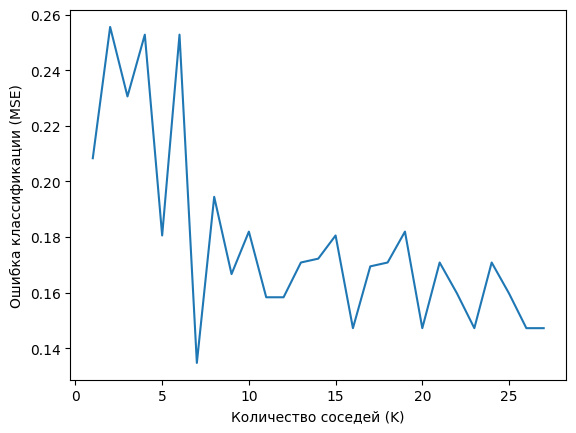

Оптимальные значения K:  [7]


In [14]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Значения параметра K
k_list = list(range(1,28))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения K
for K in k_list:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, d.iloc[ : , 0:3 ], d['Map'], cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(k_list, MSE)
plt.xlabel('Количество соседей (K)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
k_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_k_min = []
for i in range(len(MSE)):
    if MSE[i] <= k_min:
        all_k_min.append(k_list[i])

# печатаем все K, оптимальные для модели
print('Оптимальные значения K: ', all_k_min)


Палитры, которые можно использовать для визуализации

In [15]:
print(sorted(list(plt.colormaps)))

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Grays_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'berlin', 'berlin_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cr

<ipython-input-16-87133f280bd5>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
<ipython-input-16-87133f280bd5>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(fmin[j], fmax[j], plot_step))


KeyboardInterrupt: 

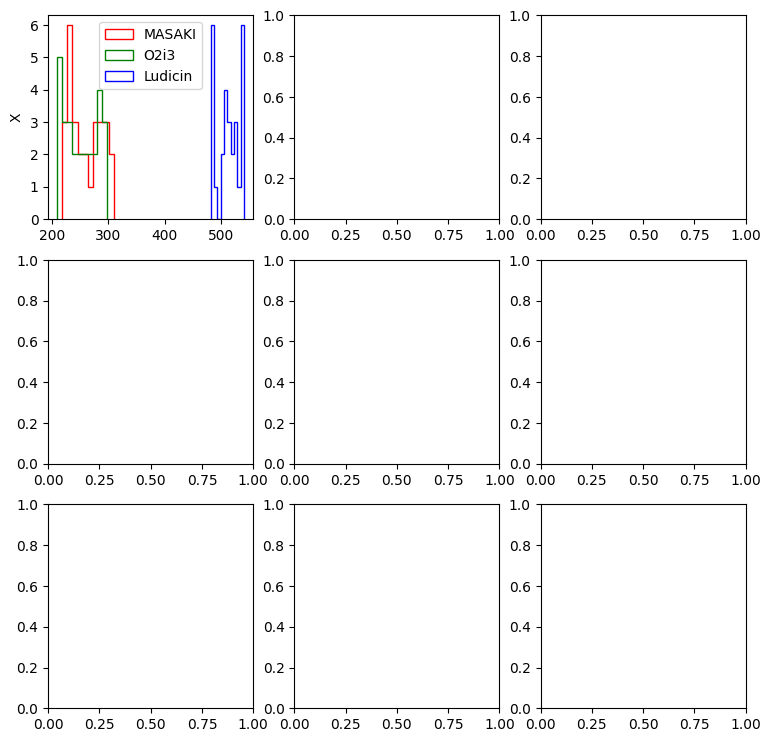

In [16]:
dX = d.iloc[:, 0:3]
dy = d['Map']

plot_markers = ['r*', 'g^', 'bo', 'ys', 'k+']  # Добавил больше маркеров
answers = dy.unique()

# Создаем подграфики для каждой пары признаков
f, places = plt.subplots(3, 3, figsize=(9, 9))

fmin = dX.min() - 0.5
fmax = dX.max() + 0.5
plot_step = 0.05

# Обходим все subplot
for i in range(0, 3):
    for j in range(0, 3):

        # Строим решающие границы
        if (i != j):
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                                 np.arange(fmin[j], fmax[j], plot_step))
            model = KNeighborsClassifier(n_neighbors=3) # Уменьшил количество соседей
            model.fit(dX.iloc[:, [i, j]].values, dy)
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            places[i, j].contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)

        # Обход всех классов
        for id_answer, answer in enumerate(answers):
            idx = np.where(dy == answer)
            if i == j:
                places[i, j].hist(dX.iloc[idx].iloc[:, i],
                                   color=plot_markers[id_answer][0],
                                   histtype='step', label=answer)
                places[i, j].legend()  # Добавляем легенду на гистограмму
            else:
                places[i, j].plot(dX.iloc[idx].iloc[:, i], dX.iloc[idx].iloc[:, j],
                                   plot_markers[id_answer],
                                   label=answer, markersize=6)

        if j == 0:
            places[i, j].set_ylabel(dX.columns[i])

        if i == 2:  # Исправлено!
            places[i, j].set_xlabel(dX.columns[j])

plt.tight_layout()
plt.show()